# Assignment 1
by Mitchell Humphries

In [1]:
#Declare imports
import numpy as np
import math as m
import matplotlib.pylab as plt
import time as tm
import csv
from mpmath import diff
from scipy.optimize import curve_fit 

# 1.Projectile Motion

In [2]:
#Define constants
g = 9.8
dt = 0.02

#Make Time Array
t = np.arange(0,10,dt) #NOTE: timestep is equal to: 2nd par / 3rd par

#define function
def plotTraj(A,V,lables,title):
    for i in range(len(A)):
        a = A[i] * m.pi/180
        v = V[i]
        x = []
        y = []
        for j in t:
            xt = ((v * j) * np.cos(a))
            yt = ((v * j) * np.sin(a)) - ((0.5*g)*(j**2))
            x.append(xt)
            y.append(yt)
            for k in range(len(x)):
                if y[k] < 0:
                    del y[k]
                    del x[k]
        plt.plot(x,y,label=lables[i])
    #Format Plot
    plt.title(title)
    plt.legend(loc = 'upper right')
    plt.xlabel('distance (m)')
    plt.ylabel('height (m)')
    #Print Plot
    plt.show() #NOTE:To create 4 seperate graphs this must be moved inside 1st for loop


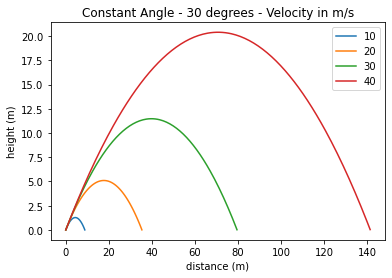

In [3]:
#Constant Angle
A1 = np.array([30,30,30,30])
V1 = np.array([10,20,30,40])
L1 = V1
T1 = "Constant Angle - 30 degrees - Velocity in m/s"
plotTraj(A1,V1,L1,T1)

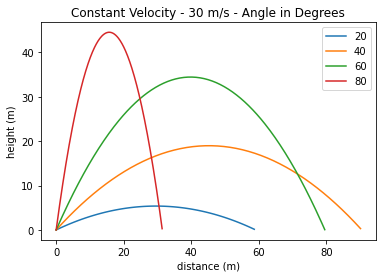

In [4]:
#Constant Velocity
A2 = np.array([20,40,60,80])
V2 = np.array([30,30,30,30])
L2 = A2
T2 = "Constant Velocity - 30 m/s - Angle in Degrees"
plotTraj(A2,V2,L2,T2)


### Analysis:
As seen with the two plots. Increasing the velocity will always result in a longer range. However, to maximize the range via the angle the sweet spot occurs around 40 degrees.

# 2.Practive with Loops

In [5]:
#Define stating values
n = 100

#Set up array
X = np.zeros(n) #NOTE:this value does not change on any plot/u value, Thus do not need to reset
X[0] = 0.001

#Define functions.

def applyrule(u):
    for i in range(n-1):
        X[i+1] = u * X[i] * (1-X[i])
        
def plotRule(values,title):
    for i in values:
        applyrule(i)
        plt.plot(range(n),X,label = i)
    #Format plot
    plt.title(title)
    plt.legend(loc='upper right')
    plt.xlabel('n')
    plt.ylabel('X(n)')
    plt.show()

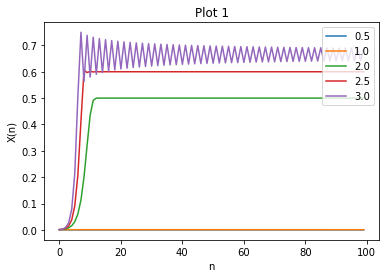

In [6]:
#Plot 1
values = np.array([0.5,1,2,2.5,3.0])
plotRule(values,'Plot 1')


### Plot 1 Analysis:
For all values, but 3.0, the graph is stable.

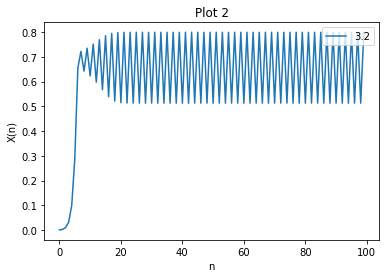

In [7]:
#2 Plot
values = np.array([3.2])
plotRule(values,'Plot 2')

### Plot 2 Analysis:
For a value of 3.2 the graph becomes more unstable as n approaches 20. After 20 the graph remains unstable. 

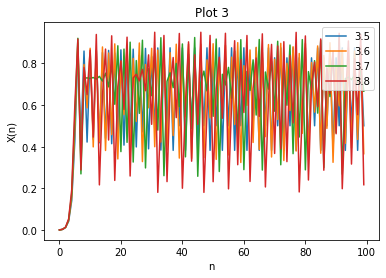

In [8]:
#3 Plot
values = np.array([3.5,3.6,3.7,3.8])
plotRule(values,'Plot 3')

### Plot 3 Analysis:
All these values are highly unstable.

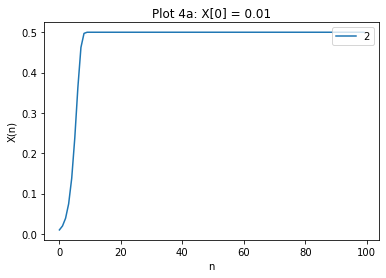

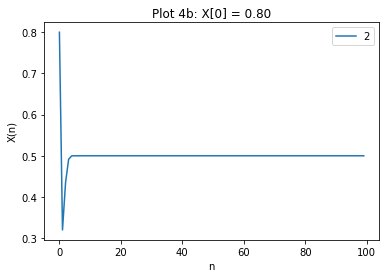

In [9]:
#4a Plot
values = np.array([2]) #NOTE: values muist be an array for the function to work. It has to be able to iterate through it.
X[0] = 0.01
plotRule(values,'Plot 4a: X[0] = 0.01')

#4b Plot
values = np.array([2])
X[0] = 0.80
plotRule(values,'Plot 4b: X[0] = 0.80')

### Plot 4 Analysis:
Changing the value of the first element of the array only changes the starting point of the graph. As seen in these graphs, both are stable at 0.5.

# 3. Code Efficiency

In [10]:
#Define Constants
xi = 5e-5
xf = 0.5
steps = 10**4

#make array of X values
dx = (xf-xi)/steps
x = np.arange(xi,xf,dx)

def eff(n):
    #Compute/time direct method
    s = 0
    directStart = tm.time()
    s = [s + (1/i) * x**i for i in range(1,n)]
    directEnd = tm.time()

    #Compute/time Backwards method
    s = 0
    backStart = tm.time()
    s = [s*x + (1/(n-i)) for i in range(1,n)]
    backEnd = tm.time()
    
    #Return "n" and each methods time
    return [n,(directEnd - directStart),(backEnd - backStart)] 

#Print header for table
print("n    Direct(s)     Backwards(s)")
 
#Comput each n values time and print as they are solved for.  
n = range(30,41) #NOTE: INCREASED THIS TO GET CONSISTENT RESULTS
for i in n:
    V = eff(i)
    print("{}    {:.8f}    {:.8f}".format(V[0],V[1],V[2]))

n    Direct(s)     Backwards(s)
30    0.00750661    0.00050044
31    0.00750637    0.00050044
32    0.00750685    0.00050020
33    0.00750637    0.00100088
34    0.00800681    0.00049996
35    0.00750589    0.00049996
36    0.00800657    0.00050092
37    0.00850725    0.00050020
38    0.00900745    0.00100112
39    0.00900722    0.00100112
40    0.00950837    0.00050044


### Analysis:
The backwards method is faster. This is because raising any number to a power greater than 1 is computationally heavy. The backwards method avoids this.

# 4.Radioactive Decay

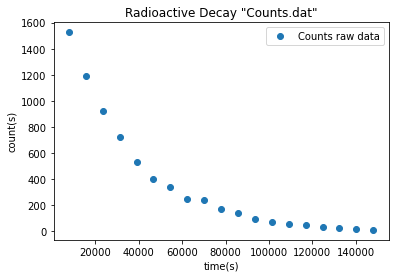

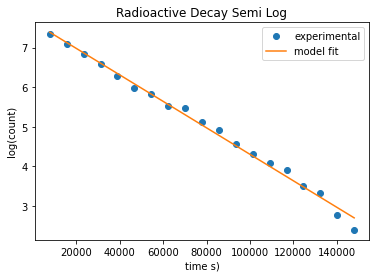

Bets fit model results: 
Time Constant Tou: 29939.37417675577
Co: 1864.0


In [11]:
#Declare two lists
time = []
count = []
Co = 0

def testFit(x, m, b):
    return m*x + b

#Read values into arrays
with open('counts.dat', mode='r') as csvFile:
    csvReader = csv.reader(csvFile,delimiter=',')
    i = 0
    for row in csvReader: #Fill Array
        if i == 0:
            Co = row[1]
            i = 1
        else:
            time.append(float(row[0]))
            count.append(float(row[1]))
            
#Make plot of raw data
plt.figure()
plt.plot(time,count,'o',label = 'Counts raw data')
plt.title('Radioactive Decay "Counts.dat"')
plt.legend(loc='upper right')
plt.xlabel('time(s)')
plt.ylabel('count(s)')
plt.show()
            
#Make Log Log info for plot
Lcount = [m.log(i) for i in count]

#Create Curve fit
param, paramCov = curve_fit(testFit, time, Lcount)
flcount = []
for i in time:
    flcount.append(testFit(i,param[0],param[1]))
    
#Make log-log Plot with line
plt.figure()
plt.plot(time,Lcount,'o',label = 'experimental') #Plot data
plt.plot(time,flcount,label = 'model fit') #Plot Model Fit
plt.title('Radioactive Decay Semi Log')
plt.legend(loc='upper right')
plt.xlabel('time s)')
plt.ylabel('log(count)')
plt.show()

#Determin Tou and print results
T = -1/param[0]
print("Bets fit model results: ")
print("Time Constant Tou: " + str(T))
print("Co: "+ str(Co))

# 5 Using subplots

### Derivation
Assume starting function: 

$ f(x) = xsin(\frac{1}{2}x) $

To obtain the first derivative apply the product rule and chain rule. 

$ f'(x)= \frac{df}{dx} = \frac{1}{2} xcos(\frac{1}{2} x) + sin(\frac{1}{2}x) $

To obtain the second derivative split the sum and differentiate the terms individually. 

$ f''(x)= \frac{d2f}{dx^2} = \frac{1}{2}( \frac{d}{dx}(xcos(\frac{1}{2} x)) +  \frac{d}{dx}(sin(\frac{1}{2}x)) $

Appy the product and chain rule on the first term. Also apply the chain rule to the second term.

$ f''(x)= \frac{1}{2}(cos(\frac{1}{2}x) - \frac{1}{2}sin(\frac{1}{2}x)) + \frac{1}{2}cos(\frac{1}{2}x)$

Distribute and combine like terms

$ f''(x)= cos(\frac{1}{2}x) - \frac{1}{4}xsin(\frac{1}{2}x)$


<function matplotlib.pyplot.show(*args, **kw)>

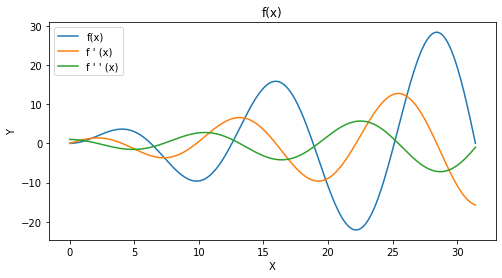

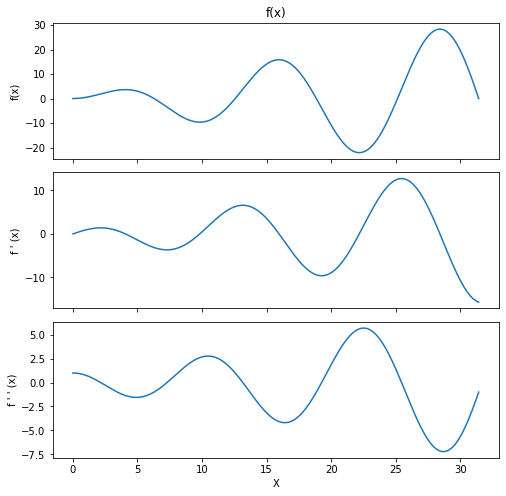

In [12]:
#Set Arrays and lists
xSpace = np.linspace(0,10*m.pi,400)

#Define function
def f(x):
    return x*m.sin(0.5*x)

def df(x):
    return 0.5*x* m.cos(0.5*x) + m.sin(0.5*x)

def ddf(x):
    return m.cos(0.5*x)-0.25*x*m.sin(0.5*x)

#Make Array for Y vales of graphs
xf = [f(i) for i in xSpace]
xdf = [df(i) for i in xSpace]
xddf = [ddf(i) for i in xSpace]

#Make first sub plot with all lines on one graph
plt.figure(figsize=(8,4))
plt.plot(xSpace,xf,label="f(x)")
plt.plot(xSpace,xdf,label="f ' (x)")
plt.plot(xSpace,xddf,label="f ' ' (x)")
plt.title('f(x)')
plt.legend(loc='upper left')
plt.xlabel('X')
plt.ylabel('Y')
plt.show



###########################################################################################

#Make another plot with each line on its own graph
plt.figure(figsize=(8,8))

#Plot f''(x)
p3 = plt.subplot(3,1,3) #On bottom
plt.plot(xSpace,xddf)
plt.xlabel("X")
plt.ylabel('f \' \' (x)')

#Plot f'(x)
p2 = plt.subplot(3,1,2) #In middle
plt.plot(xSpace,xdf)
plt.ylabel('f \' (x)')
plt.setp(p2.get_xticklabels(), visible=False)

#Plot f(x)
p1 = plt.subplot(3,1,1, sharex = p3) #On top
plt.plot(xSpace,xf)
plt.title('f(x)')
plt.ylabel('f(x)')
plt.setp(p1.get_xticklabels(), visible=False)


#Show figure
plt.subplots_adjust(hspace=0.1)
plt.show()

### Plot 1 Analysis: 
Plotting all three lines on a single graph allows you to easily compare the trends between any two lines. However, it does look rather busy and can make it difficult to see changes in a line if they are small compared to another. For example, the plot of f’’(x) is compressed along the Y axis due to being plotted with f(x)

### Plot 2 Analysis:
Plotting the three lines each on there own subplot allowed each to have their own scale for the y-axis. I chose to have them share the x axis as they are all plotted across the same values of x. As they share the x-axis, I also chose for only the bottom x axis to be labeled. I also left the tick marks for the spacing on the upper two subplots to allow the reader to easily identify numbers. 